In [10]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [11]:
%whos

Variable        Type                          Data/Info
-------------------------------------------------------
FloatProgress   MetaHasTraits                 <class 'ipywidgets.widget<...>get_float.FloatProgress'>
display         function                      <function display at 0x7fab4c16e5f0>
f               FloatProgress                 <ipywidgets.widgets.widge<...>object at 0x7fab4403b750>
i               int                           999
sleep           builtin_function_or_method    <built-in function sleep>
time            module                        <module 'time' from '/hom<...>2.7/lib-dynload/time.so'>
tqdm            function                      <function tqdm at 0x7fab44039398>
trange          function                      <function trange at 0x7fab44039668>


# progress bar for iterations
    

### widges

In [7]:
from ipywidgets import FloatProgress
from IPython.display import display
from time import sleep
f = FloatProgress(min=0, max=100)
display(f)
for i in xrange(100):
   sleep(0.1)
   f.value = i

### tqdm BETTER!

In [5]:
import time
from tqdm import *

In [9]:
for i in tqdm(range(1000)):
    time.sleep(.01)


# snippets

animation, not inline though

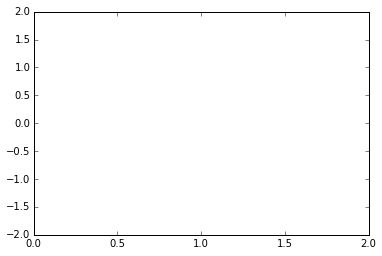

In [5]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
plt.show()

## matplotlib + widget
- import
- inline
- seaborn
- interactive widget

In [ ]:
%matplotlib inline

from ipywidgets import interact, interactive, fixed


import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#broke making plot dynamic in static page, 
# so might give problems with plotly or widgets
import seaborn as sns
sns.set(color_codes=False)


def plotfunc(n):
    x = np.linspace(0, 3*np.pi, n)
    plt.plot(x, np.sin(x**2))
    plt.title('A simple chirp')
    plt.show()
    
interact(plotfunc, n=100);


# Module import information

In [ ]:
import sys
print '\n'.join(sys.path)

# Gurobi module

In [ ]:
import sys
sys.path.append('/opt/gurobi650/linux64/lib/python2.7')
sys.path.append('/opt/gurobi650/linux64/lib')
print sys.path


In [ ]:
from gurobipy import *
m = Model()
v0 = m.addVar()
v1 = m.addVar()
m.update()
m.addConstr(v0 - v1 <= 4)
m.addConstr(v0 + v1 <= 4)
m.addConstr(-0.25*v0 + v1 <= 1)
m.setObjective(v1, GRB.MAXIMIZE)
m.params.outputflag = 0
m.optimize()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.plot([0,4], [0,4])
pyplot.plot([4,0], [0,4])
pyplot.plot([0,4], [1,2])
pyplot.plot([v0.x], [v1.x], 'ro')
pyplot.show()

# Numberjack combined with SCIP

In [ ]:
# import sys
# sys.path.append('/usr/local/lib/python2.7/dist-packages')

from Numberjack import *
# import SCIP
# import Mistral


def model_warehouse_planning(data):
    WareHouseOpen = VarArray(data.NumberOfWarehouses)
    
    ShopSupplied = Matrix(data.NumberOfWarehouses,
                          data.NumberOfShops)
    
    # Cost of running warehouses
    warehouseCost = Sum(WareHouseOpen, data.WareHouseCosts)
    
    # Cost of shops using warehouses
    transpCost = Sum([ Sum(varRow, costRow) 
                       for (varRow, costRow) in zip(ShopSupplied, data.SupplyCost)])
    
    obj = warehouseCost + transpCost
    
    model = Model(
        # Objective function
        Minimise(obj), 
        # Channel from store opening to store supply matrix
        [[var <= store for var in col] 
         for (col, store) in zip(ShopSupplied.col, WareHouseOpen)],
        # Make sure every shop if supplied by one store
        [Sum(row) == 1 for row in ShopSupplied.row],
        # Make sure that each store does not exceed it's supply capacity
        [Sum(col) <= cap 
         for (col, cap) in zip(ShopSupplied.col, data.Capacity)]
    )
    
    return (obj, WareHouseOpen, ShopSupplied, model)

def solve_warehouse_planning(data, param):
    (obj, WareHouseOpen, ShopSupplied, model) = model_warehouse_planning(data)
    solver = model.load(param['solver'])
    solver.setVerbosity(1)
    solver.solve()    
    print obj.get_value()
    print "",WareHouseOpen
    print ShopSupplied
    
class WareHouseData:
    def __init__(self):        
        self.NumberOfWarehouses = 5
        self.NumberOfShops = 10
        self.FixedCost = 30
        self.WareHouseCosts = [30, 30, 30, 30, 30]
        self.Capacity = [1,4,2,1,3]
        self.SupplyCost = supplyCost = [
            [ 20, 24, 11, 25, 30 ],
            [ 28, 27, 82, 83, 74 ],
            [ 74, 97, 71, 96, 70 ],
            [ 2, 55, 73, 69, 61 ],
            [ 46, 96, 59, 83, 4 ],
            [ 42, 22, 29, 67, 59 ],
            [ 1, 5, 73, 59, 56 ],
            [ 10, 73, 13, 43, 96 ],
            [ 93, 35, 63, 85, 46 ],
            [ 47, 65, 55, 71, 95 ]
        ]
        
# solve_warehouse_planning(WareHouseData(), {'solver':'SCIP'})

In [ ]:
solve_warehouse_planning(WareHouseData(), {'solver':'Gurobi'})
help(solver)

In [ ]:
get_value(Gurobi)

# Help and info

In [ ]:
dir(Model.load)

In [ ]:
help(Model.load)

In [ ]:

from Numberjack import *
# import gurobi
# import Mistral

def model_warehouse_planning(data):
    WareHouseOpen = VarArray(data.NumberOfWarehouses)
    
    ShopSupplied = Matrix(data.NumberOfWarehouses,
                          data.NumberOfShops)
    
    # Cost of running warehouses
    warehouseCost = Sum(WareHouseOpen, data.WareHouseCosts)
    
    # Cost of shops using warehouses
    transpCost = Sum([ Sum(varRow, costRow) 
                       for (varRow, costRow) in zip(ShopSupplied, data.SupplyCost)])
    
    obj = warehouseCost + transpCost
    
    model = Model(
        # Objective function
        Minimise(obj), 
        # Channel from store opening to store supply matrix
        [[var <= store for var in col] 
         for (col, store) in zip(ShopSupplied.col, WareHouseOpen)],
        # Make sure every shop if supplied by one store
        [Sum(row) == 1 for row in ShopSupplied.row],
        # Make sure that each store does not exceed it's supply capacity
        [Sum(col) <= cap 
         for (col, cap) in zip(ShopSupplied.col, data.Capacity)]
    )
    
    return (obj, WareHouseOpen, ShopSupplied, model)

def solve_warehouse_planning(data, param):
    (obj, WareHouseOpen, ShopSupplied, model) = model_warehouse_planning(data)
    solver = model.load(param['solver'])
    solver.setVerbosity(1)
    solver.solve()    
    print obj.get_value()
    print "",WareHouseOpen
    print ShopSupplied
    
class WareHouseData:
    def __init__(self):        
        self.NumberOfWarehouses = 5
        self.NumberOfShops = 10
        self.FixedCost = 30
        self.WareHouseCosts = [30, 30, 30, 30, 30]
        self.Capacity = [1,4,2,1,3]
        self.SupplyCost = supplyCost = [
            [ 20, 24, 11, 25, 30 ],
            [ 28, 27, 82, 83, 74 ],
            [ 74, 97, 71, 96, 70 ],
            [ 2, 55, 73, 69, 61 ],
            [ 46, 96, 59, 83, 4 ],
            [ 42, 22, 29, 67, 59 ],
            [ 1, 5, 73, 59, 56 ],
            [ 10, 73, 13, 43, 96 ],
            [ 93, 35, 63, 85, 46 ],
            [ 47, 65, 55, 71, 95 ]
        ]


In [ ]:
solve_warehouse_planning(WareHouseData(), {'solver':'Gurobi'})

In [ ]:
from Numberjack import *
from ipywidgets import interact 
    # from Numberjack import *
def func_test(m):
    print 'start'
    
    n = 2**m

    marks = [Variable(n) for i in range(m)]

    model = Model(

        Minimise( marks[-1]),
        [marks[i-1] < marks[i] for i in range(1,m)],
        AllDiff( [ (first - second) for first, second in pair_of(marks)]),
        marks[0] == 0
    )
    # solver = model.load('Gurobi')
    solver = model.load('Mistral2')
    # solver = Gurobi.Solver( model, marks )
    solver.solve()
    print 'done'
    for i in range(m):
        print marks[i]
        
%time func_test(9)        
# interact(func_test, m=5)

In [ ]:
for i in range(m):
    print marks[i]
# [print marks[i] for i in range(m)]
# solver.get_solution()

In [ ]:
help(Gurobisolver)

In [ ]:
solver.printStatistics()

In [ ]:
import matplotlib as plt
help(plt)

In [ ]:
dir(gurobi)

### line profiler

In [1]:
%load_ext line_profiler
%lprun?

In [4]:
%%writefile slow_functions.py
def main():
    n = 30000
    a = range(n)

    for i in a:
        if i > 1:
            a[i-1] = i+1
            
if __name__ == "__main__":
    main()

Overwriting slow_functions.py


In [10]:
import slow_functions
%lprun -f slow_functions.main slow_functions.main()
# %lprun -f slow_functions.main slow_functions.main()